In [23]:
 #Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install xgboost
import seaborn as sns



In [2]:
df=pd.read_csv("cover_type.csv")

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
1,2590,56,2,212,-6,390,220,235,151,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen
2,2804,139,9,268,65,3180,234,238,135,6121,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
3,2785,155,18,242,118,3090,238,238,122,6211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Lodgepole Pine
4,2595,45,2,153,-1,391,220,234,150,6172,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Aspen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145890 entries, 0 to 145889
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           145890 non-null  int64  
 1   Aspect                              145890 non-null  int64  
 2   Slope                               145890 non-null  int64  
 3   Horizontal_Distance_To_Hydrology    145890 non-null  int64  
 4   Vertical_Distance_To_Hydrology      145890 non-null  int64  
 5   Horizontal_Distance_To_Roadways     145890 non-null  int64  
 6   Hillshade_9am                       145890 non-null  int64  
 7   Hillshade_Noon                      145890 non-null  int64  
 8   Hillshade_3pm                       145890 non-null  int64  
 9   Horizontal_Distance_To_Fire_Points  145890 non-null  int64  
 10  Wilderness_Area_1                   145890 non-null  float64
 11  Wilderness_Area_2         

In [5]:
df['Cover_Type'].value_counts()

Cover_Type
Lodgepole Pine       103071
Spruce/Fir            31110
Aspen                  3069
Krummholz              2160
Ponderosa Pine         2160
Douglas-fir            2160
Cottonwood/Willow      2160
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Wilderness_Area_4                     0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


In [7]:
le = LabelEncoder()
df['Cover_Type'] = le.fit_transform(df['Cover_Type'])

In [8]:
df['Cover_Type'].dtype

dtype('int64')

In [9]:
df['Cover_Type'].value_counts()

Cover_Type
4    103071
6     31110
0      3069
3      2160
5      2160
2      2160
1      2160
Name: count, dtype: int64

In [10]:
print(df['Cover_Type'].dtype)

print(df['Cover_Type'].head())

print(df['Cover_Type'].unique())

print(df['Cover_Type'].value_counts())

print(le.classes_)


int64
0    0
1    0
2    4
3    4
4    0
Name: Cover_Type, dtype: int64
[0 4 6 3 5 2 1]
Cover_Type
4    103071
6     31110
0      3069
3      2160
5      2160
2      2160
1      2160
Name: count, dtype: int64
['Aspen' 'Cottonwood/Willow' 'Douglas-fir' 'Krummholz' 'Lodgepole Pine'
 'Ponderosa Pine' 'Spruce/Fir']


In [11]:
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)   # fit + transform training
X_test_scaled  = scaler.transform(X_test)        # only transform testing

In [18]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")



Logistic Regression: 0.8253
KNN: 0.9133
SVM: 0.8501
Random Forest: 0.9442
Gradient Boosting: 0.8679


In [19]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred_rf = rf.predict(X_test_scaled)


In [21]:
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[  479     0     7     0   119     8     1]
 [    0   416     7     0     0     9     0]
 [    3    13   377     0     1    38     0]
 [    2     0     0   414     1     0    15]
 [   30     0    11     4 20264    11   294]
 [    4    16    47     0     3   362     0]
 [   12     0     3    23   947     0  5237]]


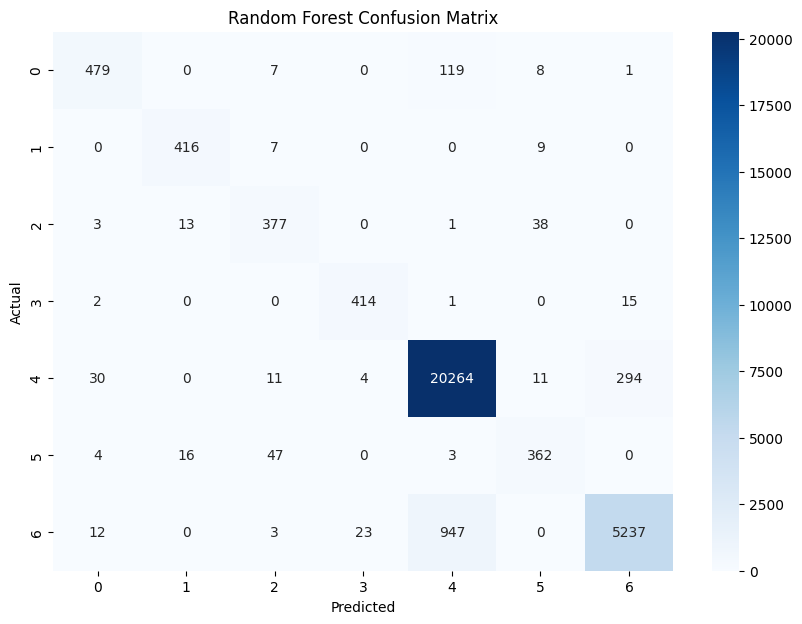

In [24]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       614
           1       0.93      0.96      0.95       432
           2       0.83      0.87      0.85       432
           3       0.94      0.96      0.95       432
           4       0.95      0.98      0.97     20614
           5       0.85      0.84      0.84       432
           6       0.94      0.84      0.89      6222

    accuracy                           0.94     29178
   macro avg       0.91      0.89      0.90     29178
weighted avg       0.94      0.94      0.94     29178



In [26]:
import pickle

# Save trained RandomForest model
with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Model, scaler, and encoder saved successfully!")


✅ Model, scaler, and encoder saved successfully!
